# Drug Prediction

During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Input Features are Age, Sex, Blood Pressure, and the Cholesterol of the patients

Output label feature is the target drug that each patient responded to

In [2]:
#IBM data set 
#https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


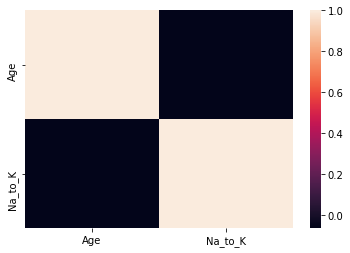

In [11]:
ax = sns.heatmap(data.corr())
plt.show()

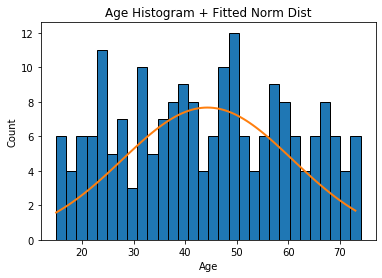

In [12]:
from scipy.stats import norm

mu, std = norm.fit(data['Age'])

plt.hist(data['Age'], bins = 30, edgecolor='black')

x = np.linspace(15, 73, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p/p.sum() *500, linewidth=2)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Histogram + Fitted Norm Dist')
plt.show()

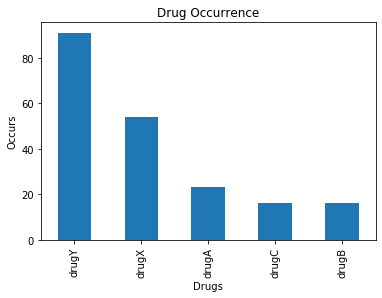

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64

In [13]:
data['Drug'].value_counts().plot.bar()
 
plt.xlabel('Drugs')
plt.ylabel('Occurs')
plt.title('Drug Occurrence')
plt.show()

occur = data.groupby(['Drug']).size()
display(occur)

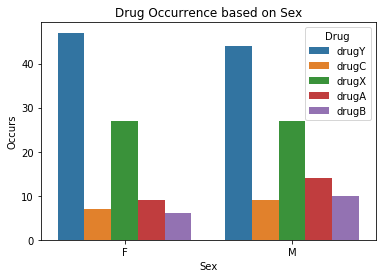

In [14]:
sns.countplot(data=data, x='Sex', hue='Drug');

plt.xlabel('Sex')
plt.ylabel('Occurs')
plt.title('Drug Occurrence based on Sex')
plt.show()

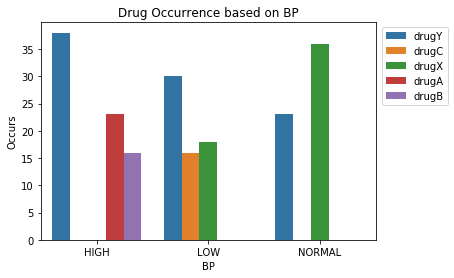

In [15]:
sns.countplot(data=data, x='BP', hue='Drug');

plt.xlabel('BP')
plt.ylabel('Occurs')
plt.title('Drug Occurrence based on BP')
plt.legend(bbox_to_anchor=(1.23, 1), loc = "upper right")
plt.show()

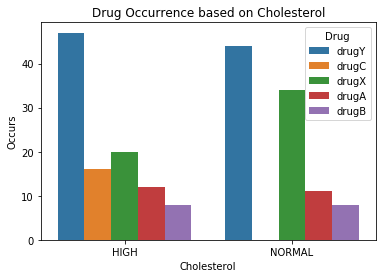

In [16]:
sns.countplot(data=data, x='Cholesterol', hue='Drug');

plt.xlabel('Cholesterol')
plt.ylabel('Occurs')
plt.title('Drug Occurrence based on Cholesterol')
plt.show()

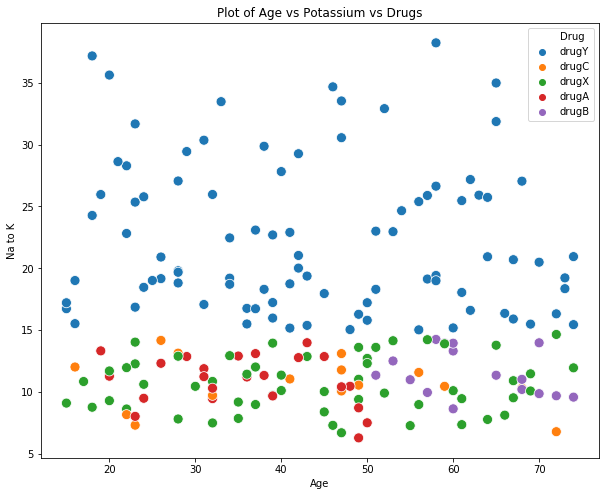

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Age', y='Na_to_K', hue='Drug', s=100);

plt.xlabel('Age')
plt.ylabel('Na to K')
plt.title('Plot of Age vs Potassium vs Drugs')
plt.show()

# Modeling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [19]:
X = data.drop('Drug', axis = 1)
Y=data['Drug']

In [20]:
X = pd.get_dummies(X, drop_first = True)
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()}

In [23]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    model_scores = pd.DataFrame(model_scores, index = ['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [24]:
baseline_model_scores = fit_score(models, X_train, X_test, y_train, y_test)
baseline_model_scores.sort_values('Score')

,Score
AdaBoostClassifier,0.650
KNeighborsClassifier,0.875
LogisticRegression,0.975
GradientBoostingClassifier,0.975
SVC,1.000
DecisionTreeClassifier,1.000
RandomForestClassifier,1.000


Thus there are plenty of good options, I am going to start with a Decision tree 

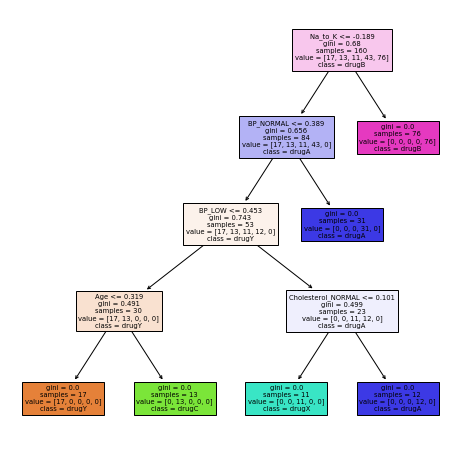

In [25]:
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(clf, feature_names = X.columns, class_names = Y.unique(), filled=True, ax=ax)
plt.show()

In [26]:
from sklearn import metrics

y_pred = clf.predict(X_test)
print('Accuracy %:', metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy %: 100.0


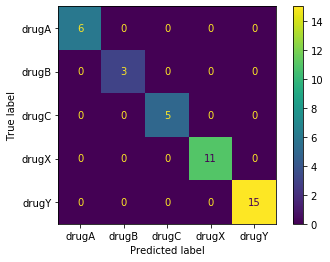

In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve 

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

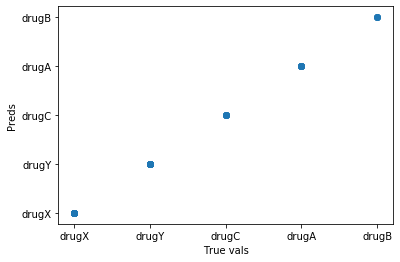

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('True vals')
plt.ylabel('Preds')
plt.show()

The Random Forest method also scored a 100% so lets check against Decision Tree method to see if results come out the same

Accuracy %: 100.0


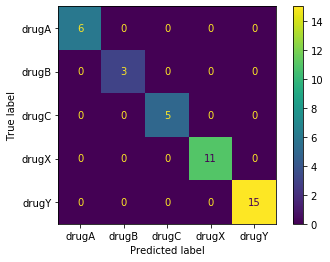

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy %:', metrics.accuracy_score(y_test, y_pred) * 100)

plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

And to test the accuracy of fit score function, we can also check accuracy from one of the other models, here is the KNC model which should have an accuracy of 0.875 for baseline number of neighbors

Accuracy %: 87.5


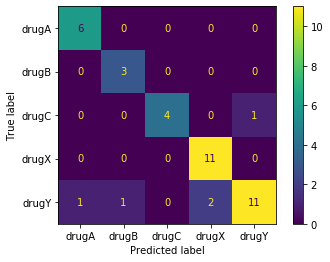

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

print('Accuracy %:', metrics.accuracy_score(y_test, y_pred) * 100)

plot_confusion_matrix(knc, X_test, y_test)
plt.show()

Now to try and improve this model, we can try adjusting the number of neighbors 

1.0 17


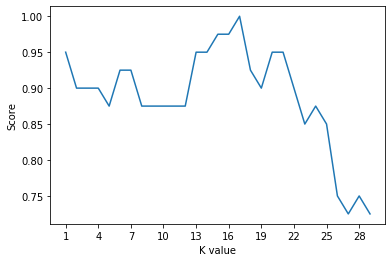

In [34]:
knnvals = []
for i in range(1,30):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    knnvals.append(knc.score(X_test, y_test))

x=range(1,30)
plt.plot(x, knnvals)
plt.xticks(np.arange(1,30,3))
ymax = max(knnvals)
xmax = x[knnvals.index(ymax)]
print(ymax, xmax)

plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

Accuracy %: 100.0


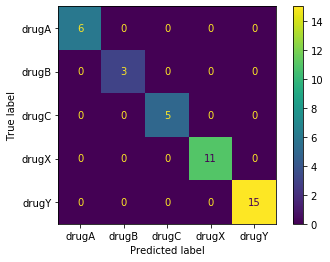

In [35]:
#rerun with optimal n_nieghbors = 17 from prev calc
knc = KNeighborsClassifier(n_neighbors=17)
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

print('Accuracy %:', metrics.accuracy_score(y_test, y_pred) * 100)

plot_confusion_matrix(knc, X_test, y_test)
plt.show()

And now we have improved our accuracy to also be perfect with this model